<a href="https://www.kaggle.com/code/mrsimple07/time-series-forecasting-using-lstm?scriptVersionId=186698763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv
/kaggle/input/time-series-basics-exploring-traditional-ts/__results__.html
/kaggle/input/time-series-basics-exploring-traditional-ts/__output__.json
/kaggle/input/time-series-basics-exploring-traditional-ts/custom.css
/kaggle/input/time-series-basics-exploring-traditional-ts/__results___files/__results___18_1.png
/kaggle/input/time-series-basics-exploring-traditional-ts/__results___files/__results___41_1.png
/kaggle/input/time-series-basics-exploring-traditional-ts/__results___files/__results___9_0.png
/kaggle/input/time-series-basics-exploring-traditional-ts/__results___files/__results___40_0.png
/kaggle/input/time-series-basics-exploring-traditional-ts/__results___files/__results___10_0.png
/kaggle/input/time-series-basics-exploring-traditional-ts/__results___files/__results___22_0.png
/kaggle/input/time-series-basics-exploring-traditional-ts/__results___files/__results___24_0.png
/kaggle/input/time-series-b

# Introduction

Time series forecasting using Long Short-Term Memory (LSTM) networks is a powerful method for predicting future values in a sequence. LSTM is a type of recurrent neural network (RNN) designed to handle long-term dependencies and overcome the vanishing gradient problem.

# Importing libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2024-07-03 14:29:49.282884: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 14:29:49.283032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 14:29:49.443079: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv('/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
df.shape

(1825, 7)

In [5]:
df.info

<bound method DataFrame.info of             Date         High          Low         Open        Close  \
0     2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1     2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2     2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3     2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4     2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   
...          ...          ...          ...          ...          ...   
1820  2020-11-16  3628.510010  3600.159912  3600.159912  3626.909912   
1821  2020-11-17  3623.110107  3588.679932  3610.310059  3609.530029   
1822  2020-11-18  3619.090088  3567.330078  3612.090088  3567.790039   
1823  2020-11-19  3585.219971  3543.840088  3559.409912  3581.870117   
1824  2020-11-20  3581.229980  3556.850098  3579.310059  3557.540039   

            Volume    Adj Close  
0     3.587980e+09  2086.590088  
1     3.884930e+09  2089.139893  
2

In [6]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


# Exploratory Data Analysis (EDA)

Checking missing values

In [7]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Date parcing and Indexing

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

df.sort_index(inplace = True)

In [9]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


Time Series Visualization

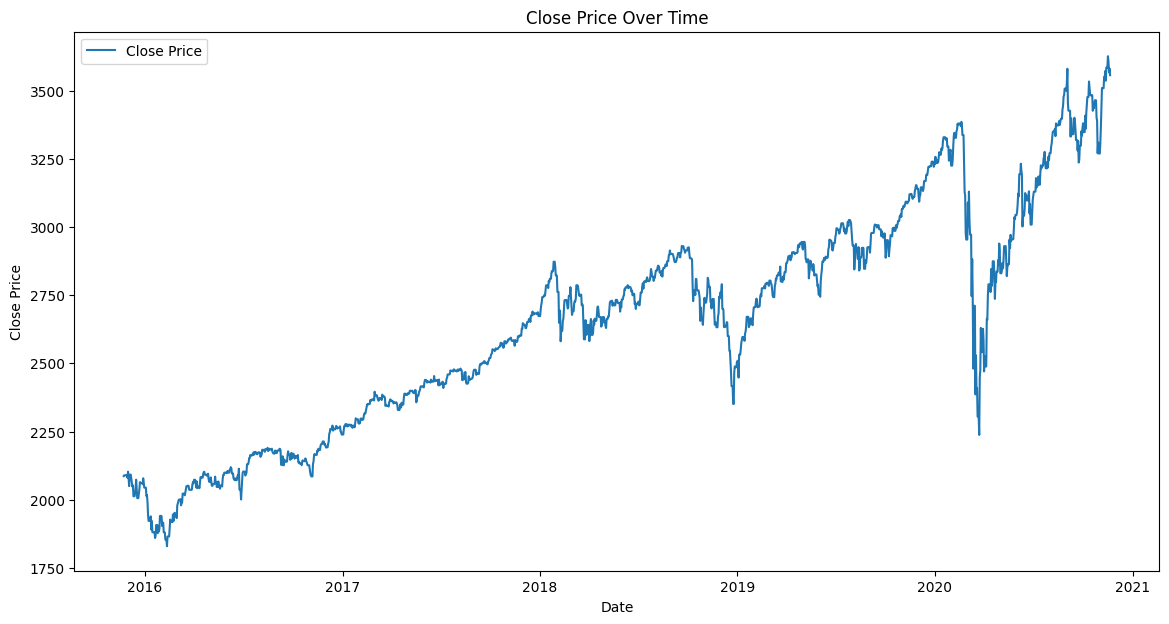

In [10]:
plt.figure(figsize = (14,7))
plt.plot(df['Close'], label = 'Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Volume Analysis

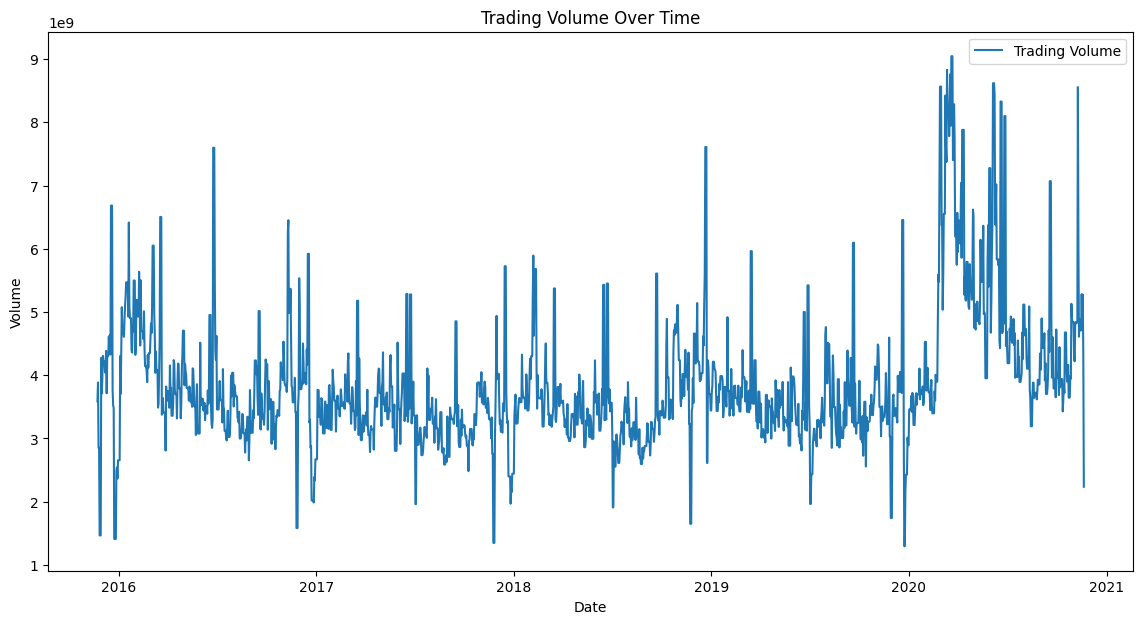

In [11]:
plt.figure(figsize=(14,7))
plt.plot(df['Volume'], label='Trading Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

Rolling Statistics

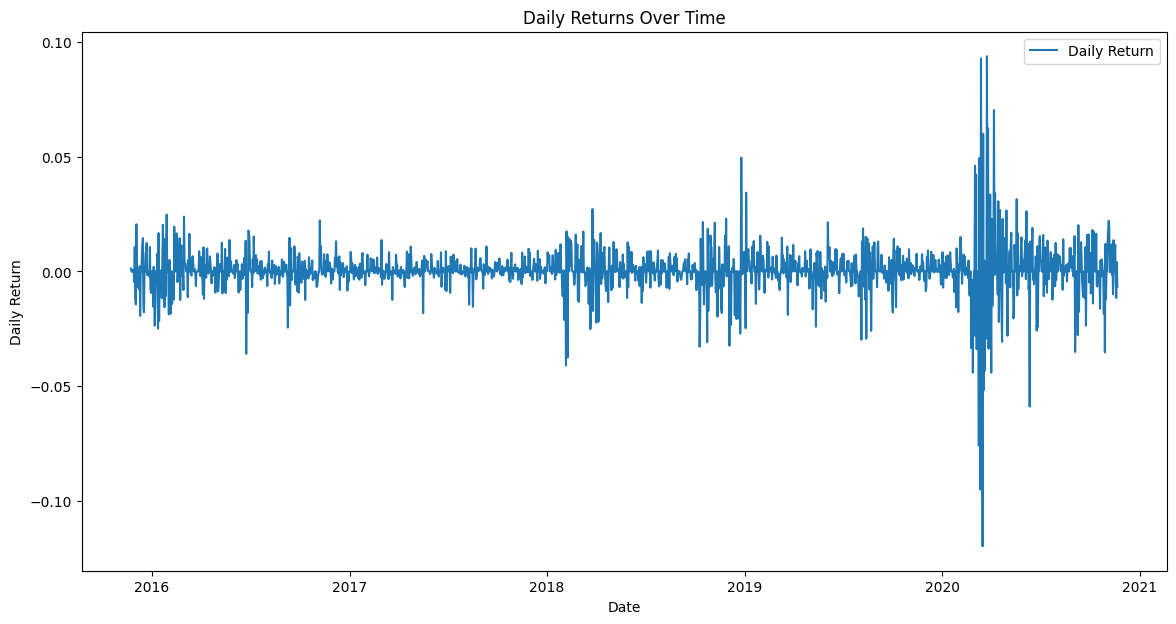

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


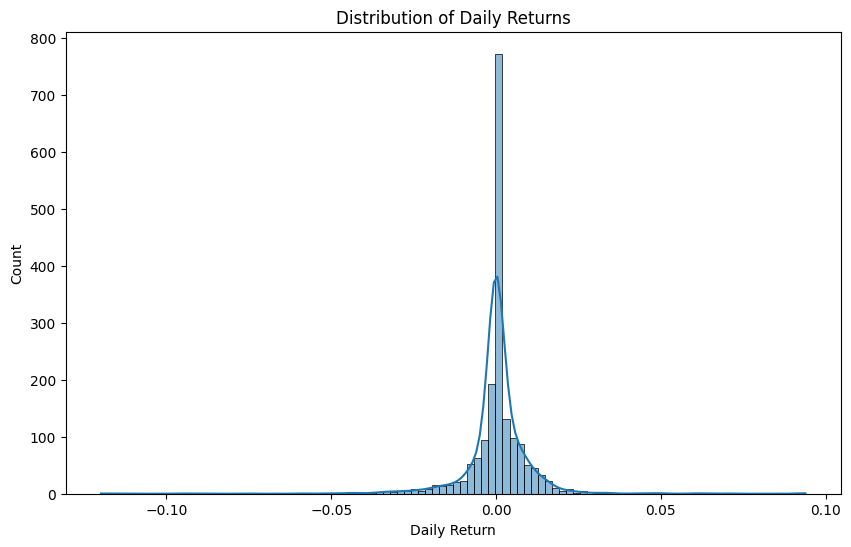

In [12]:
import seaborn as sns

df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(14,7))
plt.plot(df['Daily Return'], label='Daily Return')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()


Seasonal Decomposition for separating the time series into trend, seasonality, and residual components

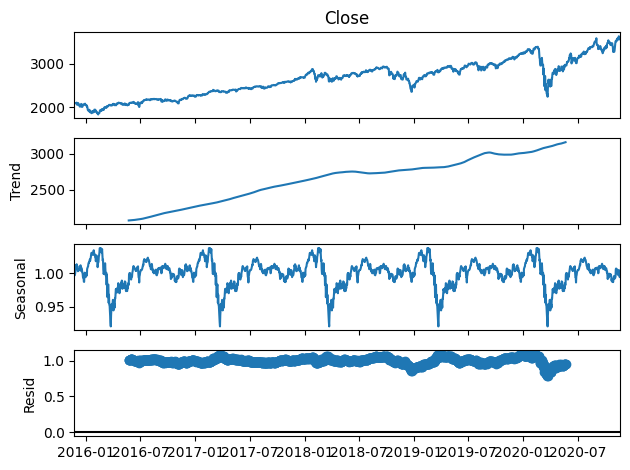

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model ='multiplicative', period = 365)
result.plot()
plt.show()

Correlation Analysis

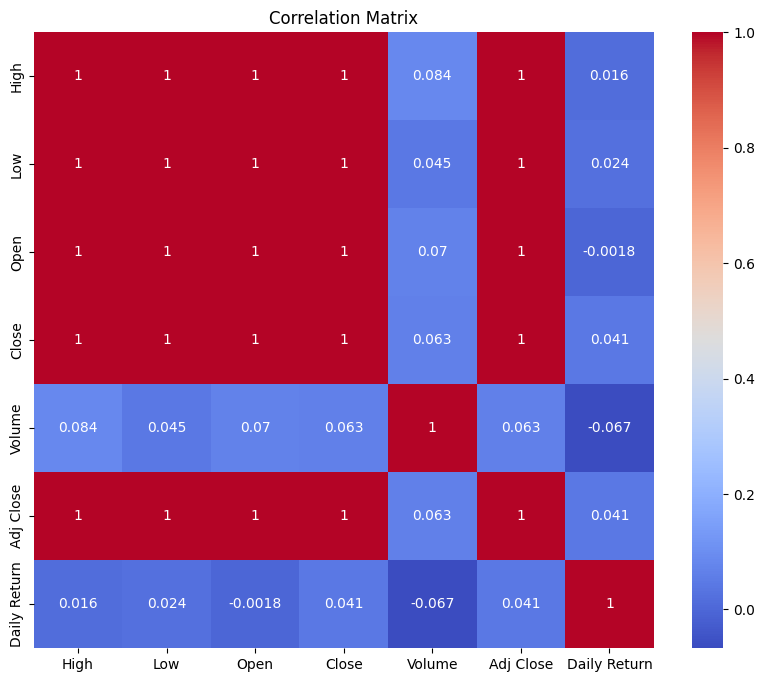

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# LSTM Time Series Forecasting

Preparing the Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

close_data = df[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

In [16]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

Building and Compling the LSTM Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation = "relu", input_shape=(sequence_length, 1)))
model.add(Dense(1)) 
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1659 - val_loss: 0.0206
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0028 - val_loss: 0.0224
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.9934e-04 - val_loss: 0.0113
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1846e-04 - val_loss: 0.0077
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6575e-04 - val_loss: 0.0059
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8295e-04 - val_loss: 0.0058
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2773e-04 - val_loss: 0.0045
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4269e-04 - val_loss: 0.0041
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7309e-04 - val_loss: 0.0036
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4071e-04 - val_loss: 0.0037
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0738e-04 - val_loss: 0.0028
Epoch 12/20
45/45 ━━━━━━━━━

In [19]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Test Loss: 0.0019813093822449446


In [20]:
# Make predictions
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [21]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

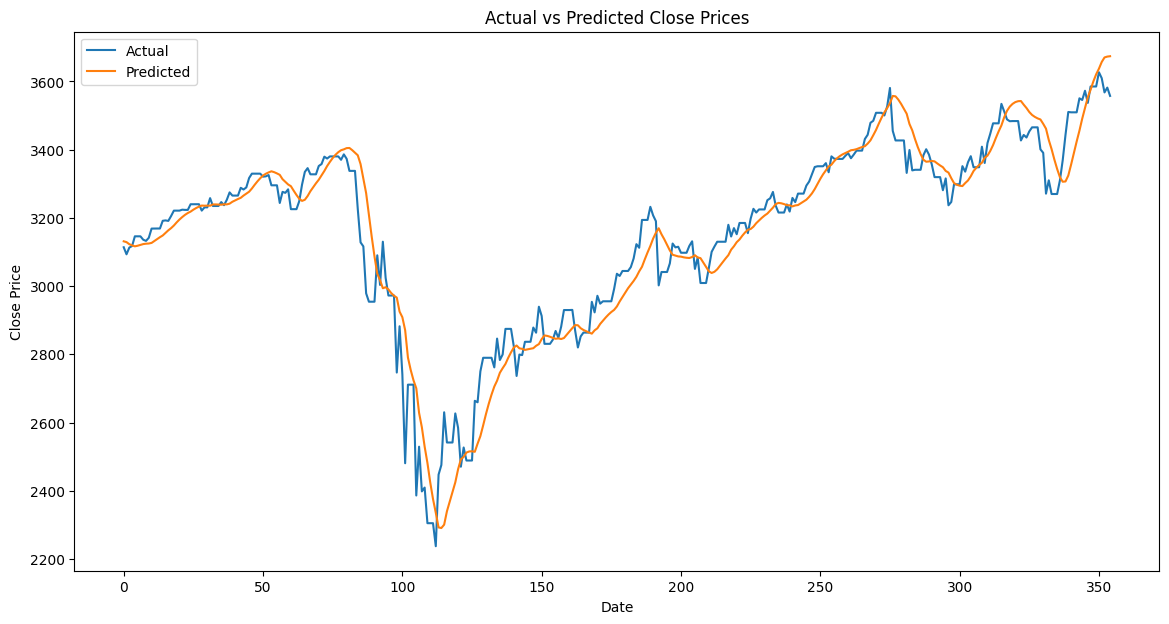

In [22]:
plt.figure(figsize=(14,7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In this work, we embarked on a journey to forecast stock market close prices using Long Short-Term Memory (LSTM) networks, leveraging a dataset containing historical stock prices. Our approach involved several critical steps, from data preprocessing and exploratory data analysis (EDA) to building and evaluating an LSTM model. Thank you for your attention!

# Possible interview questions

1. Why LSTM is good for time- series forecasting?

LSTMs are a type of recurrent neural networks (RNN) specificially designed to handle long- term dependencies in sequential data. They are well-suited for time series forecasting because they can remember important information over long periods and mitigate the vanishing gradient problem that often hampers the performance of traditional RNNs.

2. Why did we use normalizing the data? Why is it important?

Normalization was done to scale the data within a specific range, typically 0 to 1, which helps faster convergance during model training and can improve the model's performance. We used the MinMaxScaler from Scikit-Learn to normalize the 'Close' prices.

3. Architecture of the LSTM model in the project:

LSTM model consists of a single LSTM layer with 50 units, followed by a dense output layer with a single neuron, which predicts the next closing price. The LSTM layer uses the 'relu' activation function, and the model is compiled with the 'adam' optimizer and mean squared error (MSE) as the loss function.

4. Why did we choose 20 number for the epochs for training?

20 epochs as a starting point, but the number of epochs was determined based on monitoring the model's performance on the validation set. If the validation loss stopped improving or started increasing, it indicated that the model might be overfitting, and we could use early stopping to halt the training process.

5. How did we handle the overfitting during the training?

We handled overfitting by monitoring the validation loss during training. If the validation loss started to increase while the training loss continued to decrease, it indicated overfitting. We could use techniques like early stopping, dropout regularization, and cross-validation to mitigate overfitting.